# Time Series Cource Project Source Code

Mohammad Zarei & Maryam Shirban - 
Spring 1402


## 1. Data Analysis

### 1.1. Load and Prepare Data

In [1]:
# import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = pd.read_csv('ts_data/train.csv')
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
data.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [4]:
data.shape

(456548, 9)

In [5]:
# Check missing values
data.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [6]:
centers_data = pd.read_csv('ts_data/fulfilment_center_info.csv')
centers_data.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
centers_data.shape

(77, 5)

In [8]:
meals_data = pd.read_csv('ts_data/meal_info.csv')
meals_data.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [9]:
meals_data.shape

(51, 3)

In [10]:
# merge three datasets
data = pd.merge(data, centers_data, how = 'left', on = 'center_id')
data = pd.merge(data, meals_data, how = 'left', on = 'meal_id')
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [11]:
data.shape

(456548, 15)

In [12]:
data.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

The Data is merged and fortunately It seems we don't have any missing values. so the next step is detecting and dealing with outliers

In [13]:
# uniqure center-meal pairs
cases = data.loc[:, ['center_id', 'meal_id']].drop_duplicates()
cases.reset_index(inplace = True, drop = True)
cases.shape

(3597, 2)

In [14]:
# Latent missing values
latent_missing_values = cases.shape[0] * data['week'].max() - data.shape[0]
latent_missing_values

65017

In [13]:
# Detect outliers
# Select applicalble columns
cols = ['checkout_price', 'base_price', 'emailer_for_promotion', 
        'homepage_featured', 'num_orders', 'op_area']
# create a subset based on selected columns
df = data.loc[:, cols].copy()
# get a description of data
df.describe()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area
count,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000
mean,332.238933,354.156627,0.081152,0.10920,261.872760,4.083590
std,152.939723,160.715914,0.273069,0.31189,395.922798,1.091686
min,2.970000,55.350000,0.000000,0.00000,13.000000,0.900000
25%,228.950000,243.500000,0.000000,0.00000,54.000000,3.600000
50%,296.820000,310.460000,0.000000,0.00000,136.000000,4.000000
75%,445.230000,458.870000,0.000000,0.00000,324.000000,4.500000
max,866.270000,866.270000,1.000000,1.00000,24299.000000,7.000000


According to initial description of the selected columns, the only column that needs further analysis for outliers is the 'num_orders' column.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


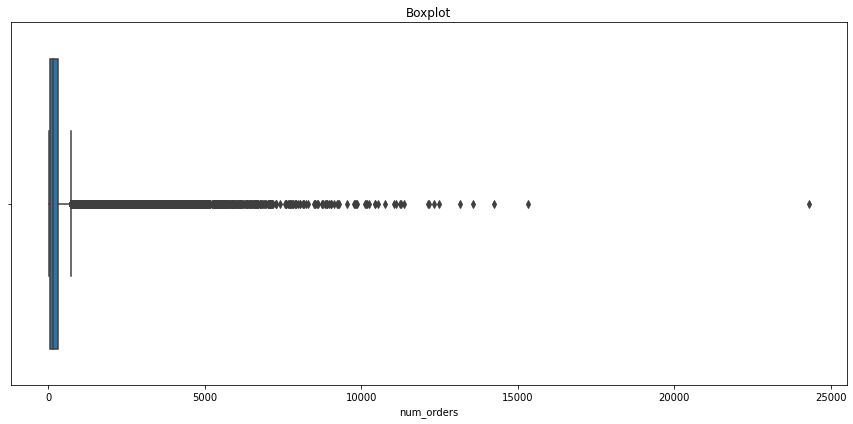

In [16]:
# Boxplot of orders count
df = data.loc[:, 'num_orders'].copy()

plt.figure(figsize=(12,6))
plt.title("Boxplot")
sns.boxplot(df)

plt.tight_layout()
plt.savefig('ts_figures/Box_plot_before_outlier_handling.jpg', dpi = 300)
plt.show()


In [17]:
# calculate z-score

outlier_zscore=[]
def Zscore_outlier(df):
    m=np.mean(df)
    sd=np.std(df)
    for i in df:
        z=(i-m)/sd
        if np.abs(z) > 3:
            outlier_zscore.append(i)
    print("Outliers of z-score:","\n",outlier_zscore)
Zscore_outlier(df)
print("Number of outliers with z-score:","\n",len(outlier_zscore))

Outliers of z-score: 
 [1498, 1594, 1984, 2132, 2418, 2078, 1688, 3511, 1525, 2902, 1648, 1499, 1485, 1540, 1608, 2591, 1552, 2052, 2011, 1513, 2727, 1958, 1498, 2619, 2794, 1741, 1566, 1770, 1673, 1566, 2672, 2241, 2335, 2443, 1499, 2011, 1768, 1579, 1660, 1621, 1837, 1540, 1891, 2606, 2120, 1796, 1743, 1635, 1620, 2187, 1525, 1795, 1849, 1620, 1620, 1458, 1526, 1458, 2148, 1458, 1608, 2377, 2498, 1783, 1472, 1485, 1864, 2363, 2498, 1945, 1662, 1554, 1512, 1808, 1621, 1607, 1592, 1565, 2067, 2471, 2349, 1593, 1526, 1580, 1891, 1742, 1835, 1619, 1606, 2363, 2526, 1607, 1796, 2132, 2458, 1459, 1742, 1635, 2472, 2363, 2200, 1593, 2364, 1863, 1635, 2161, 1823, 1850, 3172, 3052, 1580, 1608, 1648, 2483, 2618, 1646, 1540, 1484, 1538, 1457, 3280, 11260, 2524, 6466, 4819, 1863, 2349, 2430, 10745, 5400, 7127, 1768, 1458, 10435, 2552, 3524, 3010, 4320, 1539, 1459, 4011, 3456, 12489, 1770, 7601, 6359, 1661, 7722, 1702, 2349, 10259, 2849, 1957, 12137, 2875, 5399, 1716, 3295, 3361, 3025, 1823, 1592

In [18]:
# IQR method
outlier_IQR=[]
def iqr_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    Lower_tail=q1-1.5*iqr
    Upper_tail=q3+1.5*iqr
    for i in df:
        if i>Upper_tail or i<Lower_tail:
            outlier_IQR.append(i)
    print("Outliers of IQR:",outlier_IQR)
iqr_outliers(df)
print("Number of outliers with IQR:","\n",len(outlier_IQR))

Outliers of IQR: [823, 972, 756, 798, 1498, 1243, 1176, 998, 877, 744, 959, 1052, 798, 1594, 879, 1984, 783, 769, 1025, 1161, 770, 2132, 2418, 998, 2078, 1688, 1067, 3511, 756, 1404, 836, 904, 944, 986, 1202, 890, 958, 757, 782, 1525, 877, 1283, 2902, 1067, 1012, 1648, 1499, 851, 852, 742, 933, 837, 755, 1391, 823, 998, 863, 755, 918, 879, 933, 1175, 1068, 852, 1080, 877, 986, 1485, 931, 904, 1256, 1282, 891, 770, 986, 1054, 755, 1540, 1608, 730, 960, 1309, 836, 1310, 2591, 769, 744, 730, 1201, 864, 1160, 823, 1027, 986, 945, 1147, 1552, 1135, 811, 1040, 1363, 2052, 2011, 1228, 865, 756, 1513, 1014, 919, 796, 1041, 744, 784, 757, 851, 756, 864, 809, 811, 850, 1052, 1201, 769, 904, 1214, 769, 1014, 1309, 770, 1216, 2727, 1041, 878, 769, 756, 958, 863, 1026, 1108, 999, 1958, 1498, 730, 865, 998, 757, 809, 2619, 2794, 782, 852, 1741, 931, 824, 1566, 824, 905, 1270, 769, 972, 1283, 823, 877, 1229, 1214, 1161, 1770, 769, 1377, 1673, 1446, 742, 865, 1350, 769, 1566, 1419, 2672, 824, 810, 932

In [19]:
# A data with a value of "14229" , "15336" , "24299" is an outlier
for i in data["num_orders"]:
    if i==24299:
        data["num_orders"]=data["num_orders"].replace(i,13580)
    if i==15336:
        data["num_orders"]=data["num_orders"].replace(i,9815)
    if i==14229:
        data["num_orders"]=data["num_orders"].replace(i,9044)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


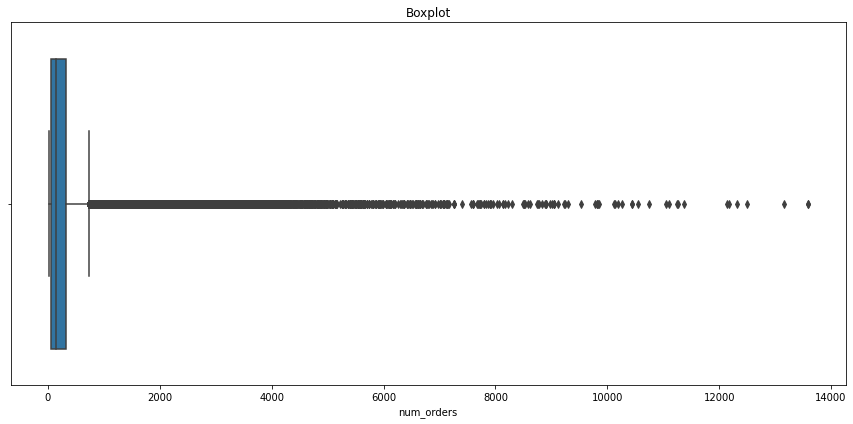

In [20]:
# Boxplot of orders count
df = data.loc[:, 'num_orders'].copy()

plt.figure(figsize=(12,6))
plt.title("Boxplot")
sns.boxplot(df)

plt.tight_layout()
plt.savefig('ts_figures/Box_plot_after_outlier_handling.jpg', dpi = 300)
plt.show()

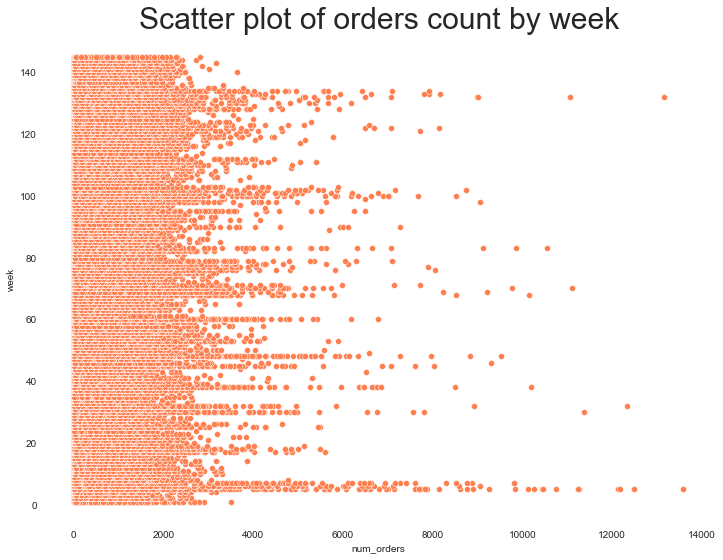

In [18]:
# Scatterplot
df = data.copy()

sns.set_style("white")
plt.figure(figsize=(12,9))
sns.scatterplot(y=df["week"],x=df['num_orders'],color='coral')
plt.ylabel('week')
sns.despine(bottom = True, left = True)
plt.title('Scatter plot of orders count by week', fontsize = 30)
plt.show()

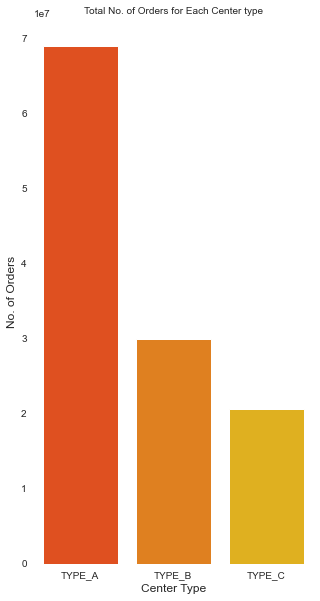

In [19]:
# Showing total number of orders for each center type with drawing barplot
fig=plt.figure(figsize=(5,10))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':10})
sns.barplot(y='num_orders', x='center_type', data = data.groupby('center_type').sum()['num_orders'].reset_index(),palette='autumn')
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True)
plt.show()

The number of unique values in 'center_id' column: 77


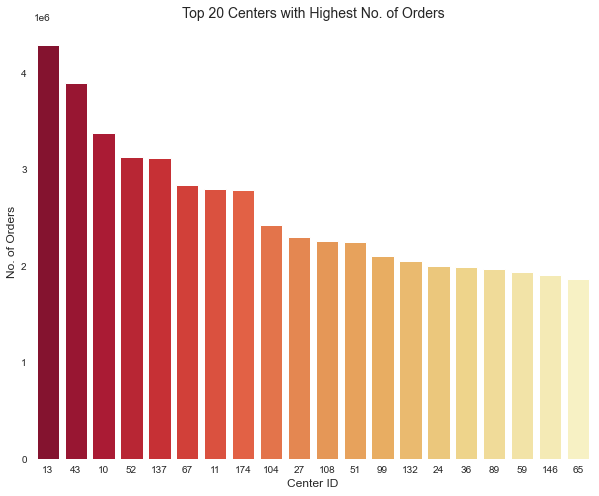

'center_id'=13: 
              id  week  center_id  meal_id  checkout_price  base_price  \
194     1171094     1         13     1885          135.86      122.28   
195     1068455     1         13     1993          134.86      122.28   
196     1105491     1         13     2539          133.86      133.86   
197     1486384     1         13     2139          337.62      437.53   
198     1345938     1         13     2631          252.23      437.47   
...         ...   ...        ...      ...             ...         ...   
453541  1385493   145         13     1543          484.03      485.03   
453542  1076678   145         13     2304          486.03      485.03   
453543  1012260   145         13     2664          241.59      335.62   
453544  1268089   145         13     2569          241.53      337.56   
453545  1361414   145         13     2490          291.03      292.03   

        emailer_for_promotion  homepage_featured  num_orders  city_code  \
194                         0 

In [20]:
print("The number of unique values in 'center_id' column:",data['center_id'].nunique())
# Showing top 20 centers with highest number of orders with drawing barplot
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=data.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(data.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True)
plt.show()
print("'center_id'=13:","\n",data[data['center_id'] == 13])

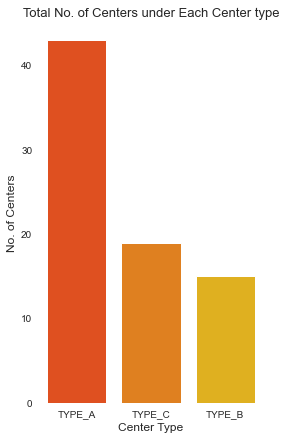

In [22]:
# Showing total number of centers under each center type with drawing barplot 
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Centers under Each Center type',fontdict={'fontsize':13})
sns.barplot(y=data.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts(), x=data.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts().index,palette='autumn')
plt.ylabel('No. of Centers',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True)
plt.show()

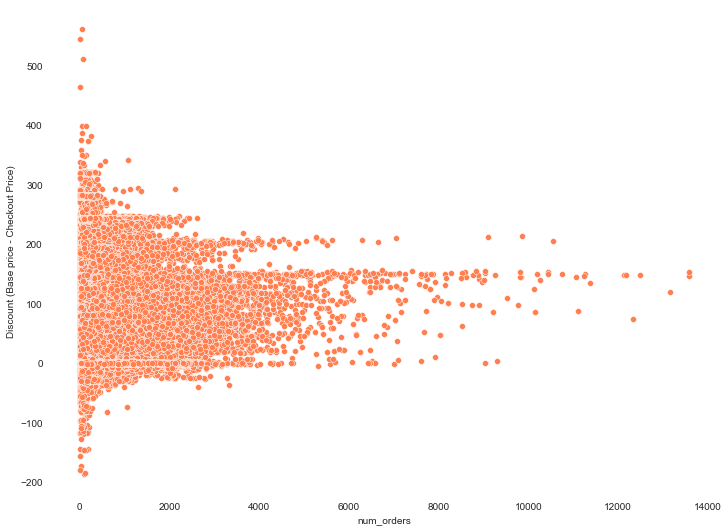

In [25]:
# Showing number of orders according to Discount (Base price - Checkout Price) with drawing scatterplot
sns.set_style("white")
plt.figure(figsize=(12,9))
sns.scatterplot(y=data['base_price']-data['checkout_price'],x=data['num_orders'],color='coral')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)
plt.show()

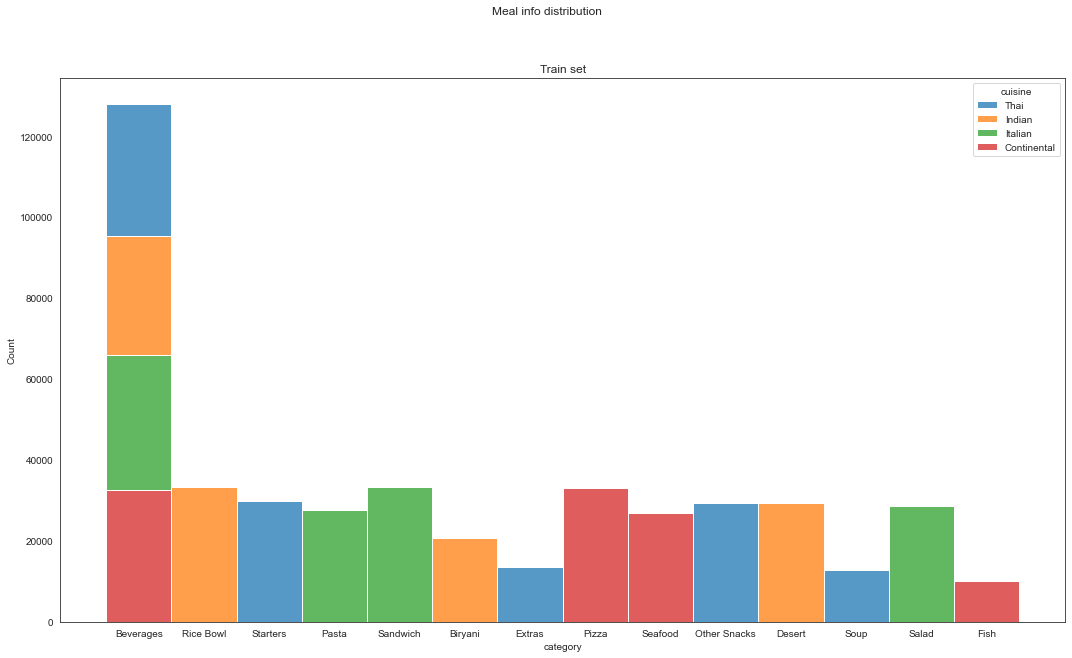

In [20]:
# Showing meal information distribution with drawing histplot
fig = plt.figure(figsize=(18,10))
fig.suptitle('Meal info distribution')
sns.histplot(data = data[['category','cuisine']],
             x='category',
             hue='cuisine',
             multiple='stack').set_title("Train set")
plt.show()

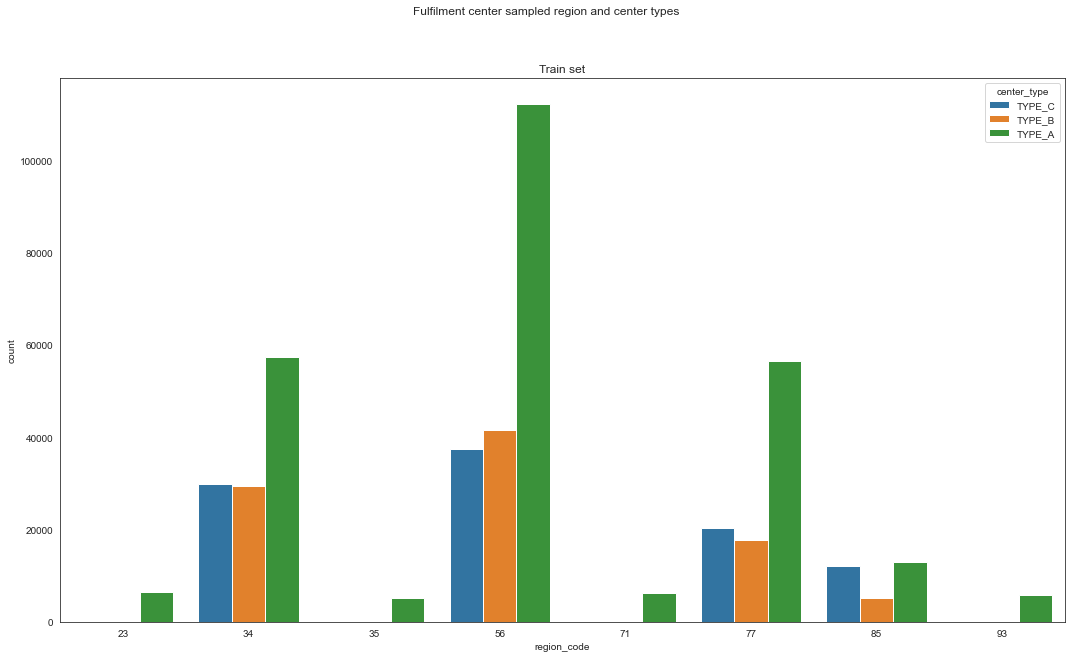

In [21]:
# Showing fulfilment center sampled region and center types with drawing countplot
fig = plt.figure(figsize=(18,10))
fig.suptitle('Fulfilment center sampled region and center types')
sns.countplot(data=data[['region_code','center_type']],
              x='region_code',
              hue='center_type').set_title("Train set")
plt.show()

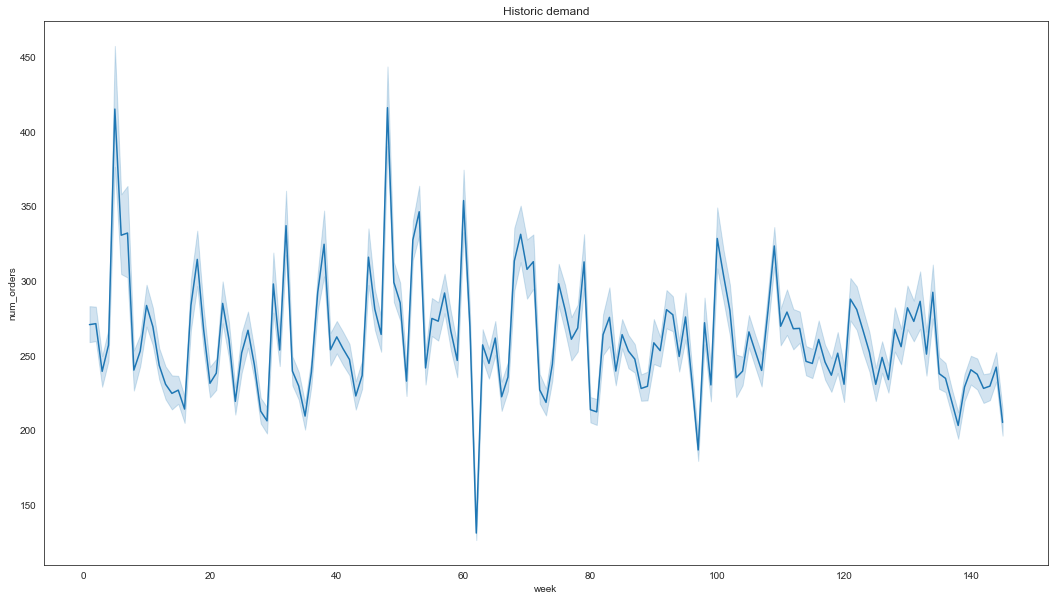

In [22]:
# Showing historic demand with drawing lineplot
df = data.copy()
df.set_index('id', inplace=True)
plt.figure(figsize=(18,10))
sns.lineplot(data=df,
             x='week',
             y='num_orders').set_title('Historic demand')
plt.show()

In [23]:
data.to_csv('ts_data/food_demand_merged.csv', index = False)

In [24]:
data_ = pd.read_csv('ts_data/food_demand_merged.csv')
data_.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
